In [1]:
# smote

!sudo pip3 install -U spacy

     |████████████████████████████████| 6.0 MB 6.2 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 653 kB 58.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.3 MB/s 
     |████████████████████████████████| 181 kB 74.0 MB/s 
     |████████████████████████████████| 451 kB 49.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 569.1 MB 19 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
sst_home='drive/My Drive/Trabajo PLN/'
train = pd.read_csv(sst_home+"/Dataset/train_data.csv",  names=["headline"])
val = pd.read_csv(sst_home+"/Dataset/validation_data.csv", names=["headline"])
test = pd.read_csv(sst_home+"/Dataset/trial_data.csv", names=["headline"])
train_label_1 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_1.csv", names=["Value"])
train_label_2 = pd.read_csv(sst_home+"/Dataset/train_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5" ])
test_label_1 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_1.csv", names=["Value"])
test_label_2 = pd.read_csv(sst_home+"/Dataset/trial_labels_subtask_2.csv", names=["Value 1", "Value 2", "Value 3", "Value 4", "Value 5" ])

Mounted at /content/drive


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import spacy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import absolute_import
# Import scikit-plot
import scikitplot as skplt

In [4]:
# Loading spacy model
nlp = spacy.load('es_core_news_lg')

In [ ]:
# Cleaning text
def getTokens(document):
  return (token.lemma_ for token in nlp(document) if
                  not token.is_punct
                  and not token.is_currency
                  and not token.is_digit
                  and not token.is_oov
                  and not token.is_space
                  and not token.is_stop
                  and not token.like_num
                  and not token.pos_ == "PROPN")


In [5]:
# Use splitted data
X_train = train['headline']
y_train = train_label_1['Value']
X_test = test['headline']
y_test = test_label_1['Value']

In [ ]:
# Split train data
X_train, X_test, y_train, y_test = train_test_split(train['headline'], train_label_1['Value'], test_size=0.2, random_state=42)

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
# Metrics with text cleaning
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=getTokens)),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC()),
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))

# %time plot_learning_curve(pipeline, "accuracy vs. training set size", X_train, y_train, cv=5)

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.70      0.61      0.65        23

    accuracy                           0.70        50
   macro avg       0.70      0.69      0.69        50
weighted avg       0.70      0.70      0.70        50



In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        27
           1       0.67      0.52      0.59        23

    accuracy                           0.66        50
   macro avg       0.66      0.65      0.65        50
weighted avg       0.66      0.66      0.65        50



              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.79      0.65      0.71        23

    accuracy                           0.76        50
   macro avg       0.77      0.75      0.75        50
weighted avg       0.76      0.76      0.76        50

CPU times: user 516 ms, sys: 99.9 ms, total: 616 ms
Wall time: 42.2 s


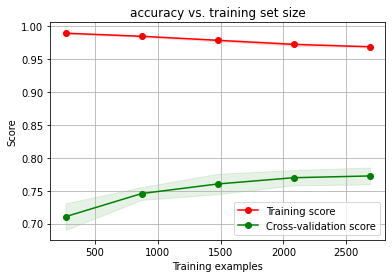

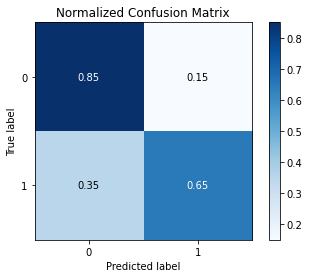

In [7]:
# Metrics without cleaning
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC()),
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))

%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_train, y_train, cv=5)

# cm = confusion_matrix(y_test, predictions)
# cm = pd.DataFrame(cm, index = ['0', '1'] , columns = ['0', '1'])
# plt.figure(figsize = (5, 5))
# sns.heatmap(cm, cmap = "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt = '' , xticklabels = ['0', '1'] , yticklabels = ['0', '1'])

# %pylab inline
# pylab.rcParams['figure.figsize'] = (5, 5)
plot = skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'classifier__C': [0.1, 1, 10, 100, 1000],
              'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'classifier__kernel': ['rbf']}
 
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3)

# grid.estimator.get_params().keys()

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf;, score=0.568 total time=   3.0s
[CV 2/5] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf;, score=0.550 total time=   3.0s
[CV 3/5] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf;, score=0.570 total time=   3.0s
[CV 4/5] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf;, score=0.574 total time=   3.0s
[CV 5/5] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf;, score=0.555 total time=   3.0s
[CV 1/5] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf;, score=0.535 total time=   2.9s
[CV 2/5] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf;, score=0.535 total time=   2.9s
[CV 3/5] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf;, score=0.534 total time=   2.9s
[CV 4/5] END classifier__C=0.1, classifier__gamma=0.1, class